# 📝 Exercise M4.03

Now, we tackle a (relatively) realistic classification problem instead of making
a synthetic dataset. We start by loading the Adult Census dataset with the
following snippet. For the moment we retain only the **numerical features**.

In [1]:
import pandas as pd

adult_census = pd.read_csv("./datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


We confirm that all the selected features are numerical.

Define a linear model composed of a `StandardScaler` followed by a
`LogisticRegression` with default parameters.

Then use a 10-fold cross-validation to estimate its generalization performance
in terms of accuracy. Also set `return_estimator=True` to be able to inspect
the trained estimators.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

numerical_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=100)
)

cv_results_num = cross_validate(
    numerical_pipeline, data, target, cv=10,
    return_estimator=True, scoring="accuracy"
)
cv_results_num

{'fit_time': array([0.08813834, 0.07645988, 0.08178067, 0.06988859, 0.07616735,
        0.08037972, 0.07894349, 0.07988119, 0.07268715, 0.06772637]),
 'score_time': array([0.0063858 , 0.00673103, 0.00704527, 0.01048279, 0.01148915,
        0.00823236, 0.00732422, 0.00851059, 0.00210357, 0.00981236]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  (

What is the most important feature seen by the logistic regression?

You can use a boxplot to compare the absolute values of the coefficients while
also visualizing the variability induced by the cross-validation resampling.

C:\Users\hp\AppData\Local\Temp\ipykernel_8572\1306798407.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(abs_coefficients, labels=data.columns)


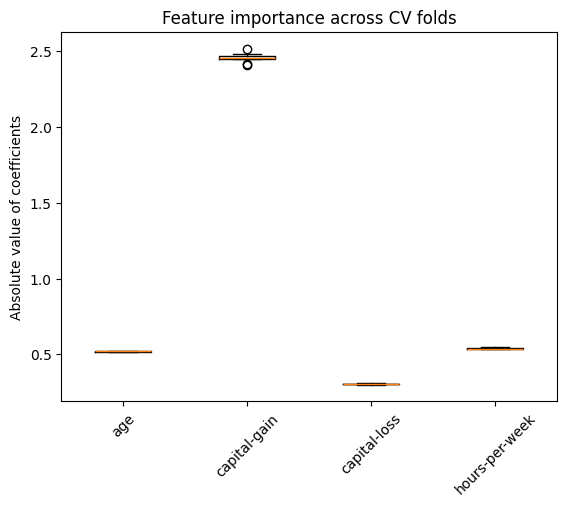

In [3]:
# Write your code here.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

coefficients = np.array([est.named_steps["logisticregression"].coef_[0] for est in cv_results_num["estimator"]])
abs_coefficients = np.abs(coefficients)

plt.boxplot(abs_coefficients, labels=data.columns)
plt.ylabel("Absolute value of coefficients")
plt.title("Feature importance across CV folds")
plt.xticks(rotation=45)
plt.show()


Let's now work with **both numerical and categorical features**. You can
reload the Adult Census dataset with the following snippet:

In [4]:
adult_census = pd.read_csv("./datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

Create a predictive model where:
- The numerical data must be scaled.
- The categorical data must be one-hot encoded, set `min_frequency=0.01` to
  group categories concerning less than 1% of the total samples.
- The predictor is a `LogisticRegression` with default parameters, except that
  you may need to increase the number of `max_iter`, which is 100 by default.

Use the same 10-fold cross-validation strategy with `return_estimator=True` as
above to evaluate the full pipeline, including the feature scaling and encoding
preprocessing.

In [5]:
# Write your code here.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include="object").columns.tolist()
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("onehotencoder", OneHotEncoder(min_frequency=0.01, sparse_output=False), categorical_columns),
    ("scaler", StandardScaler(), numerical_columns)
])

full_pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=200)
)

cv_results_full = cross_validate(
    full_pipeline, data, target, cv=10,
    return_estimator=True, scoring="accuracy"
)
cv_results_full


c:\Users\hp\Desktop\bootcamp\week-3\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:927: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\hp\Desktop\bootcamp\week-3\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 916, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\Desktop\bootcamp\week-3\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 317, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\Desktop\bootcamp\week-3\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\hp\Deskt

{'fit_time': array([1.18193436, 1.03747225, 1.09949613, 1.00533056, 1.06029391,
        0.92758536, 0.84352422, 0.9901588 , 0.97765827, 0.87280607]),
 'score_time': array([0.04726696, 0.03121114, 0.02440929, 0.02978706, 0.03079295,
        0.02038789, 0.02663803, 0.0312438 , 0.02838731, 0.01427627]),
 'estimator': [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('onehotencoder',
                                                    OneHotEncoder(min_frequency=0.01,
                                                                  sparse_output=False),
                                                    ['workclass', 'education',
                                                     'marital-status',
                                                     'occupation', 'relationship',
                                                     'race', 'sex',
                                                     'native-country']),
                            

By comparing the cross-validation test scores of both models fold-to-fold,
count the number of times the model using both numerical and categorical
features has a better test score than the model using only numerical features.

In [8]:
# Write your code here.
count_better = sum(cv_results_full["test_score"] > cv_results_num["test_score"])
count_better


np.int64(9)

For the following questions, you can copy and paste the following snippet to
get the feature names from the column transformer here named `preprocessor`.

```python
preprocessor.fit(data)
feature_names = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_columns
    )
).tolist()
feature_names += numerical_columns
feature_names
```

In [9]:
# Write your code here.
preprocessor.fit(data)
feature_names = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(categorical_columns)
).tolist()
feature_names += numerical_columns
feature_names


['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_infrequent_sklearn',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Prof-school',
 'education_ Some-college',
 'education_infrequent_sklearn',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'marital-status_infrequent_sklearn',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Ma

Notice that there are as many feature names as coefficients in the last step
of your predictive pipeline.

Which of the following pairs of features is most impacting the predictions of
the logistic regression classifier based on the absolute magnitude of its
coefficients?

In [10]:
# Write your code here.
coefficients_full = np.array([est.named_steps["logisticregression"].coef_[0] for est in cv_results_full["estimator"]])
abs_coeff_full = np.abs(coefficients_full)
mean_abs_coeff = abs_coeff_full.mean(axis=0)

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": mean_abs_coeff
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(10)


,feature,importance
61,capital-gain,2.343352
17,education_ Doctorate,1.826529
20,education_ Prof-school,1.789503
22,education_infrequent_sklearn,1.738830
24,marital-status_ Married-civ-spouse,1.487255
12,education_ 7th-8th,1.372850
19,education_ Masters,1.290095
13,education_ 9th,1.206267
11,education_ 5th-6th,1.181268
26,marital-status_ Never-married,1.105761


Now create a similar pipeline consisting of the same preprocessor as above,
followed by a `PolynomialFeatures` and a logistic regression with `C=0.01` and
enough `max_iter`. Set `degree=2` and `interaction_only=True` to the feature
engineering step. Remember not to include a "bias" feature to avoid
introducing a redundancy with the intercept of the subsequent logistic
regression.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate


numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = data.select_dtypes(include=["object", "category"]).columns.tolist()


preprocessor = ColumnTransformer([
    ("onehotencoder", OneHotEncoder(min_frequency=0.01, sparse_output=False, handle_unknown="ignore"), categorical_columns),
    ("scaler", StandardScaler(), numerical_columns)
])


interaction_pipeline = make_pipeline(
    preprocessor,
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LogisticRegression(C=0.01, max_iter=500)
)


cv_results_interaction = cross_validate(
    interaction_pipeline, data, target, cv=10,
    scoring="accuracy"
)

cv_results_interaction



{'fit_time': array([12.94801736, 11.53689098, 12.32091355, 12.10715294, 12.87012148,
        13.16725016, 13.28628731, 11.32401919, 12.85706449, 10.79749632]),
 'score_time': array([0.13479996, 0.13073778, 0.14776969, 0.18055487, 0.13786459,
        0.14482784, 0.13094449, 0.1419642 , 0.14971089, 0.14315367]),
 'test_score': array([0.85383828, 0.85383828, 0.8527846 , 0.85298935, 0.84930385,
        0.8503276 , 0.85462735, 0.8523751 , 0.85565111, 0.85176085])}

Use the same 10-fold cross-validation strategy as above to evaluate this
pipeline with interactions. In this case there is no need to return the
estimator, as the number of features generated by the `PolynomialFeatures` step
is much too large to be able to visually explore the learned coefficients of the
final classifier.

By comparing the cross-validation test scores of both models fold-to-fold,
count the number of times the model using multiplicative interactions and both
numerical and categorical features has a better test score than the model
without interactions.

In [ ]:
# Write your code here.